In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from embryo_segmenting import *
from resnet_unet import *
from deeplabv3 import *

In [3]:
import torch.optim as optim
from torch.optim import lr_scheduler

In [4]:
data_dir = '../dataset'
image_datasets = {x: Dataset(os.path.join(data_dir, x), image_size=513, mask_size=65, is_deeplab=True)
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, 
                                             shuffle=True, num_workers=4, drop_last=True)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [5]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 2

model = DeepLabV3(
        n_classes=num_class,
        n_blocks=[3, 4, 23, 3],
        atrous_rates=[6, 12, 18],
        multi_grids=[1, 2, 4],
        output_stride=8,
    ).to(device)

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=3e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)        

cuda:2


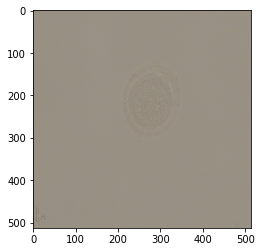

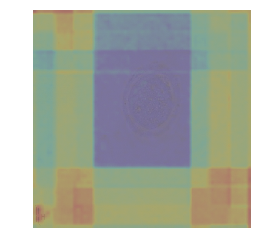

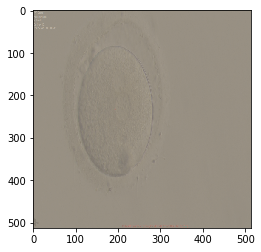

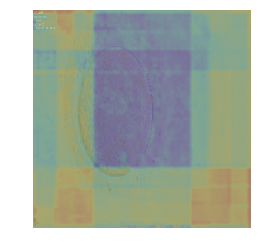

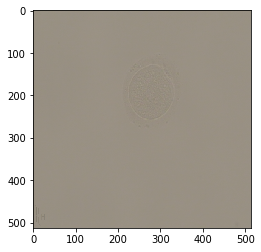

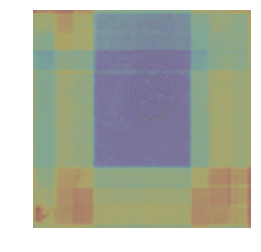

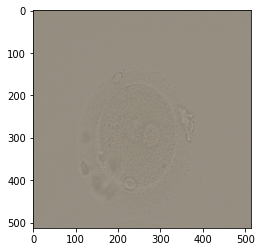

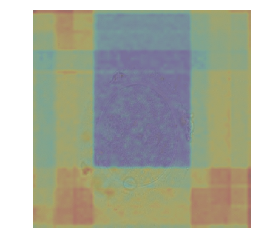

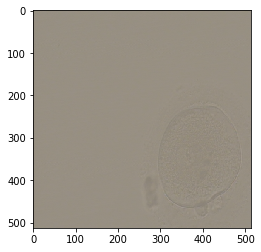

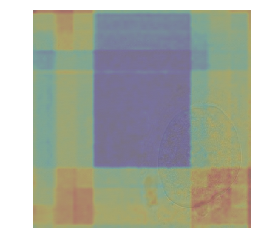

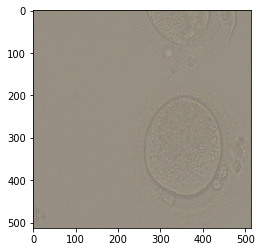

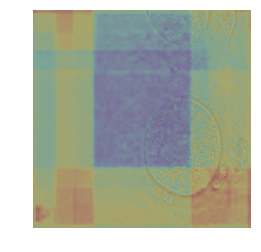

In [6]:
visualize_segmenter(model, dataloaders['val'], device)

In [7]:
model = train_model(model, optimizer_ft, exp_lr_scheduler, dataloaders, device, num_epochs=20)

Epoch 0/19
----------
LR 0.0003
train: iou: 0.702590, aed: 1.642308, bce: 0.260017, dice: 0.263281, loss: 0.261649
val: iou: 0.732567, aed: 0.159483, bce: 0.168922, dice: 0.185320, loss: 0.177121
saving best model
2m 13s
Epoch 1/19
----------
LR 0.0003
train: iou: 0.790322, aed: 0.213462, bce: 0.137413, dice: 0.135673, loss: 0.136543
val: iou: 0.736917, aed: 0.310345, bce: 0.134757, dice: 0.127569, loss: 0.131163
saving best model
2m 13s
Epoch 2/19
----------
LR 0.0003
train: iou: 0.841673, aed: 0.332692, bce: 0.100772, dice: 0.087677, loss: 0.094224
val: iou: 0.856747, aed: 0.193966, bce: 0.080138, dice: 0.070455, loss: 0.075297
saving best model
2m 17s
Epoch 3/19
----------
LR 0.0003
train: iou: 0.865677, aed: 0.334615, bce: 0.081092, dice: 0.070455, loss: 0.075773
val: iou: 0.815048, aed: 0.711207, bce: 0.121099, dice: 0.100320, loss: 0.110710
2m 13s
Epoch 4/19
----------
LR 0.0003
train: iou: 0.876349, aed: 0.261538, bce: 0.074150, dice: 0.060830, loss: 0.067490
val: iou: 0.868124,

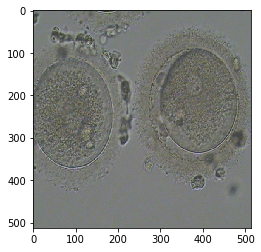

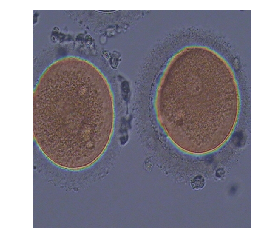

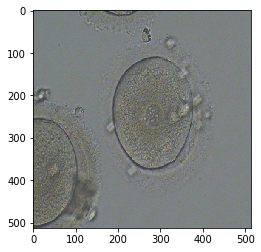

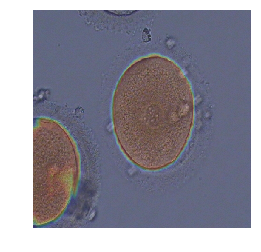

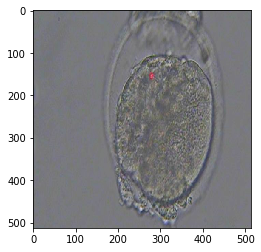

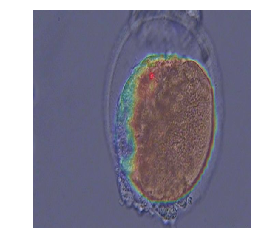

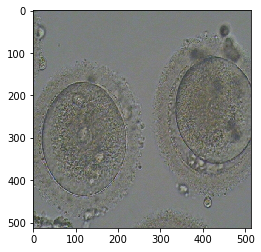

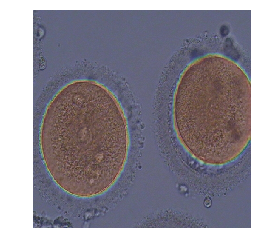

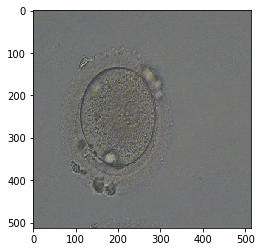

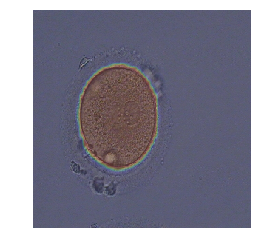

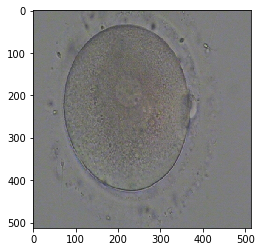

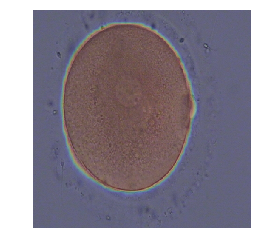

In [8]:
visualize_segmenter(model, dataloaders['val'], device)

In [9]:
results = score_segmenter(model, dataloaders, device)
print(results)

(0.907696244835164, 0.17672413793103448)


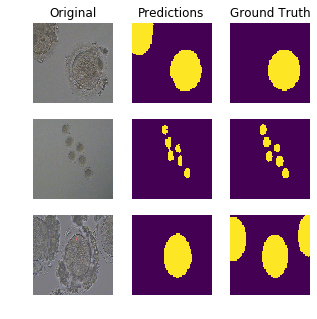

In [17]:
visualize_counting_errors(model, dataloaders['val'], device, 3)

In [16]:
from plotting import *

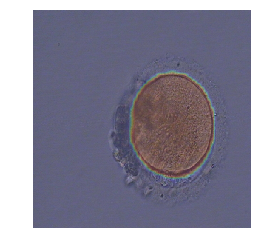

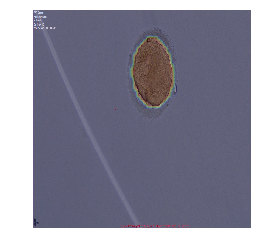

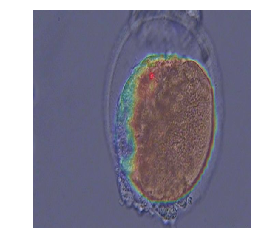

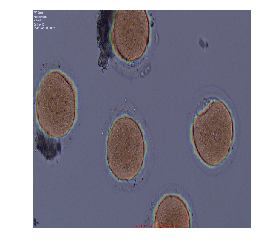

In [14]:
pretty_plot_segmenter(model, dataloaders['val'], device)